In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import k2
import torch
import sys

In [3]:
from min_rnnt.losses import GraphStarTransducerLoss

In [4]:
loss = GraphStarTransducerLoss(blank=0, connect_composed=True)

In [5]:
labels = k2.SymbolTable.from_str("""
    <b> 0
    A 1
    C 2
    T 3
    <sf> 4
""")

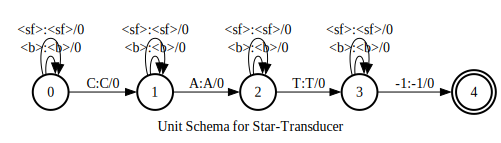

In [6]:
unit_schema = loss.get_unit_schema(torch.tensor([2, 1, 3]), 4)  # CAT
unit_schema.labels_sym = labels
unit_schema.aux_labels_sym = labels
unit_schema.draw("units.svg", title="Unit Schema for Star-Transducer")

In [7]:
unit_schema.unit_positions

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3, -1], dtype=torch.int32)

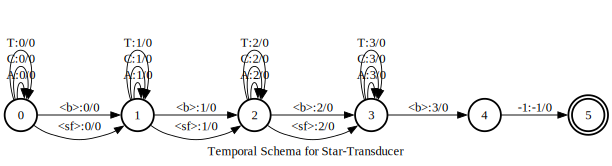

In [8]:
temporal_schema = loss.get_temporal_schema(num_frames=4, vocab_size=4, device=torch.device("cpu"))
temporal_schema.labels_sym = labels
temporal_schema.draw("temporal.svg", title="Temporal Schema for Star-Transducer")

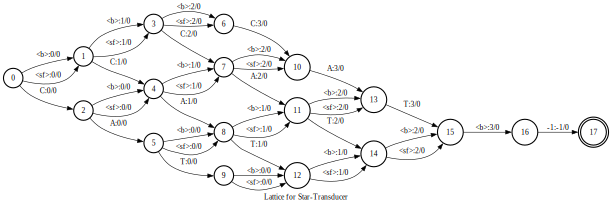

In [9]:
composed_lattice = loss.get_composed_lattice(torch.tensor([2, 1, 3]), num_frames=4, vocab_size=4)
composed_lattice.labels_sym = labels
composed_lattice.draw("composed.svg", title="Lattice for Star-Transducer")

In [10]:
composed_lattice.unit_positions

tensor([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  2,  2,  2,
         0,  1,  1,  1,  2,  2,  2,  3,  3,  1,  2,  2,  2,  3,  3,  2,  3,  3,
         3, -1], dtype=torch.int32)